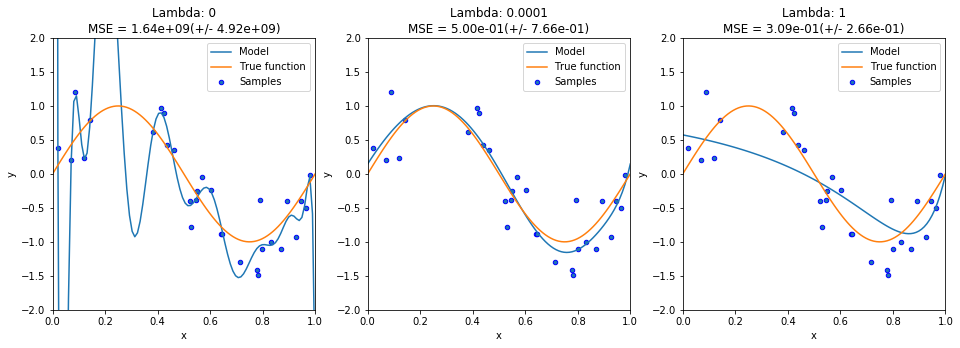

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.sin(2 * np.pi * X)

np.random.seed(0)

# meta-parameters
n_samples = 30                      # number of samples
degree = 15                            # polynomial degree
lambdas = [0, 1e-4, 1]            # list of regulirazation coeffectives

# training data
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.3

polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)

plt.figure(figsize=(16, 5))
# iterate for lambdas
for i in range(len(lambdas)):
    lamda = lambdas[i]
    
    reg = Ridge (alpha=lamda)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("reg", reg)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    ax = plt.subplot(1, len(lambdas), i + 1)
    plt.setp(ax, xlabel="x", ylabel="y", xlim=(0, 1), ylim=(-2, 2))
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.legend(loc="best")
    plt.title("Lambda: {}\nMSE = {:.2e}(+/- {:.2e})".format(
        lamda, -scores.mean(), scores.std()))

plt.show()